The dataset contains 768 samples, each with attributes related to the design of buildings such as wall area, roof area, overall height, glazing area, and orientation. It includes two target variables: the heating load (energy required for heating) and the cooling load (energy required for cooling) of the building. The dataset is relevant for optimizing building energy efficiency and minimizing consumption.
Your objective is to predict the Heating Load of a building based on its physical attributes and architectural design.
(i) Perform data pre-processing steps on the dataset. Handle missing values (if any), explore the correlation between variables, and identify any potential outliers.

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
dataset = pd.read_csv('ENB2012_data111.csv')
# Normalize the dataset 
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(dataset.drop(columns=["Y1", "Y2"]))
normalized_dataset = pd.DataFrame(normalized_features, columns=dataset.columns[:-2])
normalized_dataset["Y1"] = dataset["Y1"]
normalized_dataset["Y2"] = dataset["Y2"]

X_normalized = normalized_dataset.drop(columns=["Y1", "Y2"])
y_normalized = normalized_dataset["Y1"]
#there is no null values so we will not 

In [31]:
print(dataset.isnull().sum())
# Summary statistics
print(dataset.describe())

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64
               X1          X2          X3          X4         X5          X6  \
count  768.000000  768.000000  768.000000  768.000000  768.00000  768.000000   
mean     0.764167  671.708333  318.500000  176.604167    5.25000    3.500000   
std      0.105777   88.086116   43.626481   45.165950    1.75114    1.118763   
min      0.620000  514.500000  245.000000  110.250000    3.50000    2.000000   
25%      0.682500  606.375000  294.000000  140.875000    3.50000    2.750000   
50%      0.750000  673.750000  318.500000  183.750000    5.25000    3.500000   
75%      0.830000  741.125000  343.000000  220.500000    7.00000    4.250000   
max      0.980000  808.500000  416.500000  220.500000    7.00000    5.000000   

               X7         X8          Y1          Y2  
count  768.000000  768.00000  768.000000  768.000000  
mean     0.234375    2.81250   22.307201   24.587760  
std      0.133221    

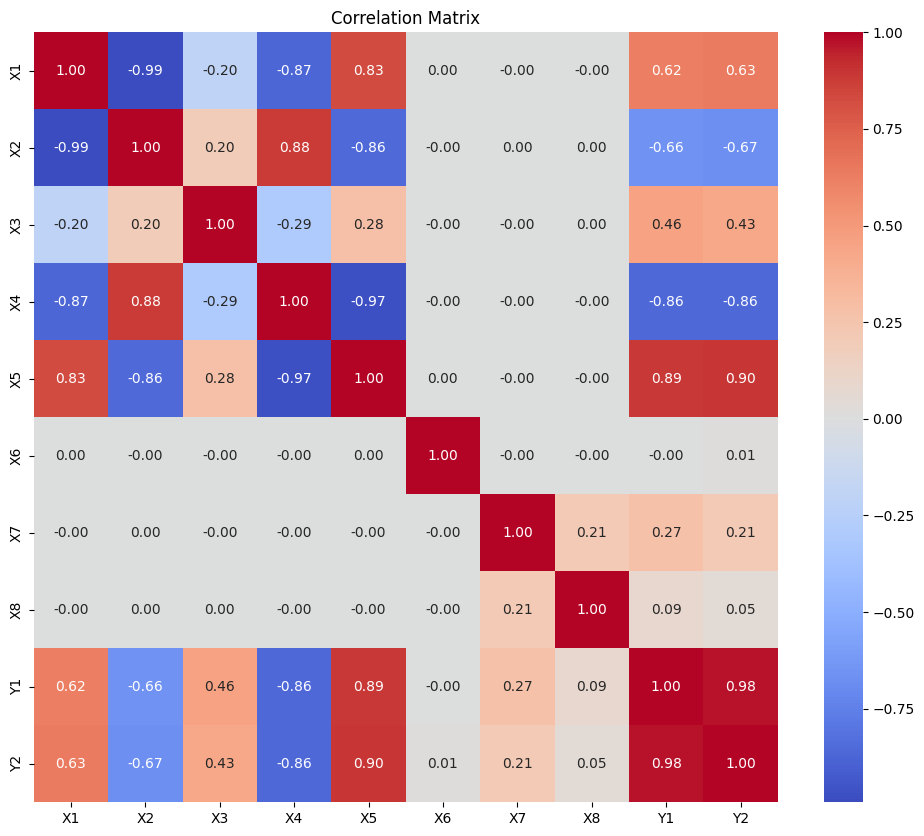

Y1    1.000000
Y2    0.975862
X5    0.889431
X1    0.622272
X3    0.455671
X7    0.269841
X8    0.087368
X6   -0.002587
X2   -0.658120
X4   -0.861828
Name: Y1, dtype: float64


In [32]:
correlation_matrix = dataset.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
#this will show the heatmap of the correlation matrix

correlated_features = correlation_matrix['Y1'].sort_values(ascending=False)
print(correlated_features)

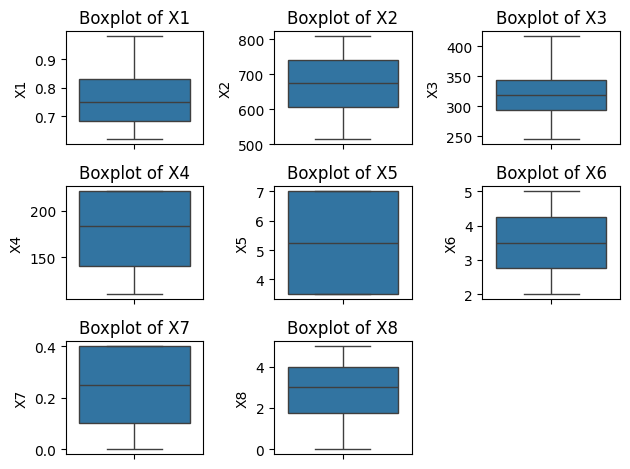

In [33]:
# Plot boxplots
plt.figure()
for i, column in enumerate(data.columns[:-2], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()
#there are no outliers here so we don't ned to worry

(ii) Split the dataset into an 80:20 ratio for training and testing using the sklearn library.

In [34]:
# Split dataset into training (80%) and testing (20%) sets
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(
    X_normalized, y_normalized, test_size=0.2, random_state=42
)


(iii) Train a multivariate linear regression model from scratch using numpy, pandas, and matplotlib. Additionally, train a linear regression model using the sklearn library on the training dataset. Also train ridge and lasso regression model using the sklearn library on the training dataset

In [35]:
# Function to train linear regression from scratch using pseudoinverse
def train_linear_regression(X, y):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  
    theta_best = np.linalg.pinv(X_b.T @ X_b) @ X_b.T @ y  
    return theta_best

# Function to predict using the manual linear regression model
def predict_manual(X, theta):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
    return X_b @ theta

# Train manual linear regression model
theta_manual_norm = train_linear_regression(X_train_norm, y_train_norm)
y_pred_manual_norm = predict_manual(X_test_norm, theta_manual_norm)

# Evaluate manual linear regression
r2_manual = r2_score(y_test_norm, y_pred_manual_norm)
mse_manual = mean_squared_error(y_test_norm, y_pred_manual_norm)
rmse_manual = np.sqrt(mse_manual)

# Gradient Descent Implementation
def gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    m, n = X.shape
    theta = np.zeros(n + 1) 
    X_b = np.c_[np.ones((m, 1)), X] 
    for _ in range(iterations):
        gradients = (2 / m) * X_b.T @ (X_b @ theta - y)
        theta -= learning_rate * gradients
    return theta

# Train manual linear regression using gradient descent
theta_gd = gradient_descent(X_train_norm, y_train_norm, learning_rate=0.1, iterations=1000)
y_pred_gd = predict_manual(X_test_norm, theta_gd)

# Evaluate gradient descent model
r2_gd = r2_score(y_test_norm, y_pred_gd)
mse_gd = mean_squared_error(y_test_norm, y_pred_gd)
rmse_gd = np.sqrt(mse_gd)

# Train sklearn Linear Regression model
lr_model_norm = LinearRegression()
lr_model_norm.fit(X_train_norm, y_train_norm)
y_pred_sklearn_norm = lr_model_norm.predict(X_test_norm)

# Train Ridge Regression model
ridge_model_norm = Ridge(alpha=1.0)
ridge_model_norm.fit(X_train_norm, y_train_norm)
y_pred_ridge_norm = ridge_model_norm.predict(X_test_norm)

# Train Lasso Regression model
lasso_model_norm = Lasso(alpha=0.1)
lasso_model_norm.fit(X_train_norm, y_train_norm)
y_pred_lasso_norm = lasso_model_norm.predict(X_test_norm)

iv) Evaluate the performance for each model on the test dataset using following metrics: R2 score, Mean Squared Error (MSE) and Root Mean Squared Error(RMSE). Compare the performance of the manual model and the sklearn model and plot the predicted vs actual values for both models

Model Evaluation Results (Normalized Data):
                                         Model  R2 Score        MSE      RMSE
0     Manual Linear Regression (Pseudoinverse)  0.912184   9.153188  3.025424
1  Manual Linear Regression (Gradient Descent)  0.906647   9.730327  3.119347
2                    Sklearn Linear Regression  0.912184   9.153188  3.025424
3                             Ridge Regression  0.908730   9.513225  3.084352
4                             Lasso Regression  0.902697  10.142087  3.184664


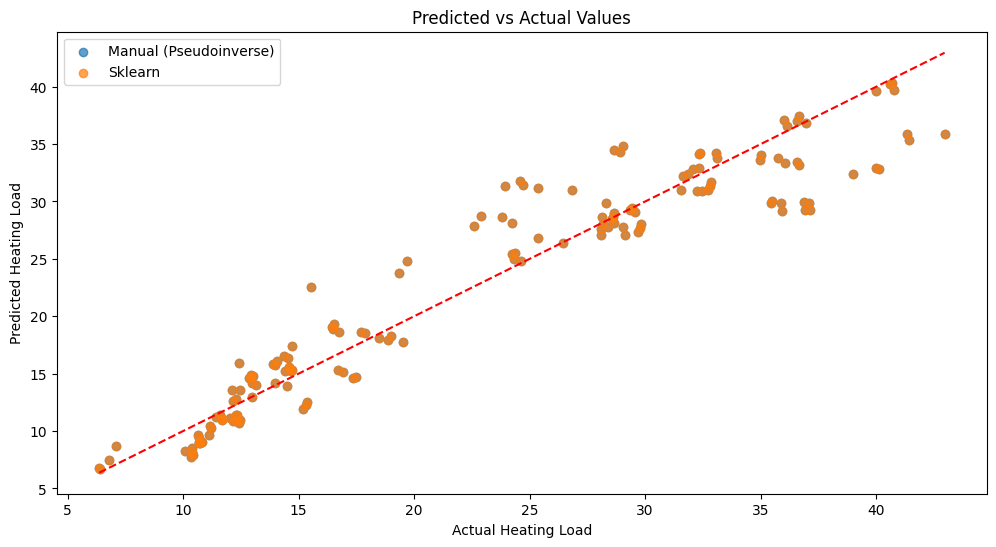

In [36]:
# Evaluate all models
results_norm = {
    "Model": ["Manual Linear Regression (Pseudoinverse)", "Manual Linear Regression (Gradient Descent)",
              "Sklearn Linear Regression", "Ridge Regression", "Lasso Regression"],
    "R2 Score": [
        r2_manual, r2_gd,
        r2_score(y_test_norm, y_pred_sklearn_norm),
        r2_score(y_test_norm, y_pred_ridge_norm),
        r2_score(y_test_norm, y_pred_lasso_norm)
    ],
    "MSE": [
        mse_manual, mse_gd,
        mean_squared_error(y_test_norm, y_pred_sklearn_norm),
        mean_squared_error(y_test_norm, y_pred_ridge_norm),
        mean_squared_error(y_test_norm, y_pred_lasso_norm)
    ],
    "RMSE": [
        rmse_manual, rmse_gd,
        np.sqrt(mean_squared_error(y_test_norm, y_pred_sklearn_norm)),
        np.sqrt(mean_squared_error(y_test_norm, y_pred_ridge_norm)),
        np.sqrt(mean_squared_error(y_test_norm, y_pred_lasso_norm))
    ]
}

# Display evaluation results
results_norm_df = pd.DataFrame(results_norm)
print("Model Evaluation Results (Normalized Data):")
print(results_norm_df)

# Plot Predicted vs Actual values for Manual Linear Regression and Sklearn
plt.figure(figsize=(12, 6))
plt.scatter(y_test_norm, y_pred_manual_norm, alpha=0.7, label="Manual (Pseudoinverse)")
plt.scatter(y_test_norm, y_pred_sklearn_norm, alpha=0.7, label="Sklearn")
plt.plot([y_test_norm.min(), y_test_norm.max()], [y_test_norm.min(), y_test_norm.max()], 'r--')
plt.title("Predicted vs Actual Values")
plt.xlabel("Actual Heating Load")
plt.ylabel("Predicted Heating Load")
plt.legend()
plt.show()

Enhance wall and roof insulation to reduce heating demands. Use energy-efficient glazing to minimize heat loss effectively. Orient the building strategically to harness passive solar heating. Adopt a compact design to reduce the surface area-to-volume ratio, limiting heat dissipation.